<a href="https://colab.research.google.com/github/Bhuviii03/MineLogic_Hackathon/blob/main/Incident_Analysis_in_Coal_Mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [462]:
df = pd.read_csv("/content/coal_mine_incidents.csv", parse_dates=["Date of Incident"])
df.head()

,Date of Incident,State,Mine Name,Type of Mine,Shift,Worker Age,Worker Experience (Years),Occupation/Role,Accident Type,Root Cause Category,Injury Severity,Description,PPE Used,No. of Persons Killed,No. of Persons Seriously Injured,Place of Accident,Responsibility,Company
0,2016-01-05,Tamil Nadu,Neyveli Mine IA,Below Ground,B,42,5.4,Fitter,Other Causes,Miscellaneous / Procedural,Serious Injury,Other Causes incident at Belt Conveyor Line in...,Yes,0,1,Belt Conveyor Line,Shared,NLC
1,2016-01-06,Maharashtra,Umrer OCP,Below Ground,C,36,13.6,Dumper Operator,Falls (Other than Fall of Ground),Unsafe Act / Unsafe Condition,Serious Injury,Falls (Other than Fall of Ground) incident at ...,No,0,1,Working Face,Worker,WCL
2,2016-01-12,Jharkhand,Katras Colliery,Opencast,C,35,3.5,Fitter,Falls (Other than Fall of Ground),Unsafe Act / Unsafe Condition,Serious Injury,Falls (Other than Fall of Ground) incident at ...,Yes,0,1,Haul Road,Worker,BCCL
3,2016-01-12,Telangana,Srirampur Area,Below Ground,B,27,5.1,Overman,Transportation Machinery (Non-Winding),Human Error / Equipment Interface,Serious Injury,Transportation Machinery (Non-Winding) inciden...,Yes,0,2,Gate Roadway,Worker & Supervisor,SCCL
4,2016-01-13,Jharkhand,Lodna Colliery,Above Ground,A,27,9.2,Overman,Ground Movement,Ground Instability,Serious Injury,Ground Movement incident at Surface Substation...,Yes,0,1,Surface Substation,Management (Design/Safety),BCCL


In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date of Incident                  400 non-null    datetime64[ns]
 1   State                             400 non-null    object        
 2   Mine Name                         400 non-null    object        
 3   Type of Mine                      400 non-null    object        
 4   Shift                             400 non-null    object        
 5   Worker Age                        400 non-null    int64         
 6   Worker Experience (Years)         400 non-null    float64       
 7   Occupation/Role                   400 non-null    object        
 8   Accident Type                     400 non-null    object        
 9   Root Cause Category               400 non-null    object        
 10  Injury Severity                   400 non-null    

In [464]:
df.isna().sum()

,0
Date of Incident,0
State,0
Mine Name,0
Type of Mine,0
Shift,0
Worker Age,0
Worker Experience (Years),0
Occupation/Role,0
Accident Type,0
Root Cause Category,0


In [465]:
df.describe(include="all") #quick statistical summary of the dataset.

,Date of Incident,State,Mine Name,Type of Mine,Shift,Worker Age,Worker Experience (Years),Occupation/Role,Accident Type,Root Cause Category,Injury Severity,Description,PPE Used,No. of Persons Killed,No. of Persons Seriously Injured,Place of Accident,Responsibility,Company
count,400,400,400,400,400,400.000000,400.000000,400,400,400,400,400,400,400.00000,400.000000,400,400,400
unique,NaN,9,35,3,3,NaN,NaN,10,8,8,2,349,2,NaN,NaN,15,6,9
top,NaN,Madhya Pradesh,Umrer OCP,Below Ground,A,NaN,NaN,Mining Sirdar,Falls (Other than Fall of Ground),Unsafe Act / Unsafe Condition,Serious Injury,Falls (Other than Fall of Ground) incident at ...,No,NaN,NaN,Working Face,Worker,SECL
freq,NaN,100,22,236,148,NaN,NaN,53,147,147,320,4,210,NaN,NaN,50,147,73
mean,2019-02-01 04:55:12,NaN,NaN,NaN,NaN,33.930000,6.669000,NaN,NaN,NaN,NaN,NaN,NaN,0.23500,0.900000,NaN,NaN,NaN
min,2016-01-05 00:00:00,NaN,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN
25%,2017-05-04 18:00:00,NaN,NaN,NaN,NaN,28.000000,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,NaN,NaN,NaN
50%,2018-10-18 12:00:00,NaN,NaN,NaN,NaN,34.000000,6.600000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,NaN,NaN,NaN
75%,2020-11-29 12:00:00,NaN,NaN,NaN,NaN,39.250000,9.225000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,NaN,NaN,NaN
max,2022-12-28 00:00:00,NaN,NaN,NaN,NaN,54.000000,18.700000,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.000000,NaN,NaN,NaN


# **Basic cleaning & feature engineering**

In [466]:
# standardizing text columns
text_cols = ["State","Mine Name","Type of Mine","Shift","Occupation/Role",
             "Accident Type","Root Cause Category","Injury Severity",
             "PPE Used","Place of Accident","Responsibility","Company"]
for c in text_cols:
    df[c] = df[c].astype(str).str.strip()

# ensuring numeric columns are numeric
df["Worker Age"] = pd.to_numeric(df["Worker Age"], errors="coerce")
df["Worker Experience (Years)"] = pd.to_numeric(df["Worker Experience (Years)"], errors="coerce")
df["No. of Persons Killed"] = pd.to_numeric(df["No. of Persons Killed"], errors="coerce")
df["No. of Persons Seriously Injured"] = pd.to_numeric(df["No. of Persons Seriously Injured"], errors="coerce")

#removing duplicate rows
df = df.drop_duplicates()

#creating year and month groups
df["Year"]  = df["Date of Incident"].dt.year
df["Month"] = df["Date of Incident"].dt.month

#creating age and experience groups
age_bins  = [0, 27, 32, 37, 47, 60, 100]
age_lbls  = ["≤27","28–32","33–37","38–47","48–60","60+"]
df["Age Group"] = pd.cut(df["Worker Age"], bins=age_bins, labels=age_lbls, right=True)

exp_bins = [-1, 0, 1, 5, 10, 20, 100]
exp_lbls = ["Fresher (0)","<1","1–5","6–10","11–20","20+"]
df["Experience Group"] = pd.cut(df["Worker Experience (Years)"], bins=exp_bins, labels=exp_lbls)

#allocating values to severity of injuries (Minor=0, Major=1, Fatal=2)
sev_map = {"Minor":0, "Major":1, "Fatal":2}
df["Severity Score"] = df["Injury Severity"].map(sev_map)

#allocating values to risk of injuries (Low risk=0, High risk=1)
df["High Risk"] = df["Injury Severity"].isin(["Major","Fatal"]).astype(int)

df.head()

,Date of Incident,State,Mine Name,Type of Mine,Shift,Worker Age,Worker Experience (Years),Occupation/Role,Accident Type,Root Cause Category,Injury Severity,Description,PPE Used,No. of Persons Killed,No. of Persons Seriously Injured,Place of Accident,Responsibility,Company,Year,Month,Age Group,Experience Group,Severity Score,High Risk
0,2016-01-05,Tamil Nadu,Neyveli Mine IA,Below Ground,B,42,5.4,Fitter,Other Causes,Miscellaneous / Procedural,Serious Injury,Other Causes incident at Belt Conveyor Line in...,Yes,0,1,Belt Conveyor Line,Shared,NLC,2016,1,38–47,6–10,NaN,0
1,2016-01-06,Maharashtra,Umrer OCP,Below Ground,C,36,13.6,Dumper Operator,Falls (Other than Fall of Ground),Unsafe Act / Unsafe Condition,Serious Injury,Falls (Other than Fall of Ground) incident at ...,No,0,1,Working Face,Worker,WCL,2016,1,33–37,11–20,NaN,0
2,2016-01-12,Jharkhand,Katras Colliery,Opencast,C,35,3.5,Fitter,Falls (Other than Fall of Ground),Unsafe Act / Unsafe Condition,Serious Injury,Falls (Other than Fall of Ground) incident at ...,Yes,0,1,Haul Road,Worker,BCCL,2016,1,33–37,1–5,NaN,0
3,2016-01-12,Telangana,Srirampur Area,Below Ground,B,27,5.1,Overman,Transportation Machinery (Non-Winding),Human Error / Equipment Interface,Serious Injury,Transportation Machinery (Non-Winding) inciden...,Yes,0,2,Gate Roadway,Worker & Supervisor,SCCL,2016,1,≤27,6–10,NaN,0
4,2016-01-13,Jharkhand,Lodna Colliery,Above Ground,A,27,9.2,Overman,Ground Movement,Ground Instability,Serious Injury,Ground Movement incident at Surface Substation...,Yes,0,1,Surface Substation,Management (Design/Safety),BCCL,2016,1,≤27,6–10,NaN,0


In [467]:
# date range
df["Date of Incident"].min(), df["Date of Incident"].max(), df.shape

(Timestamp('2016-01-05 00:00:00'), Timestamp('2022-12-28 00:00:00'), (400, 24))

In [468]:
df["Injury Severity"].value_counts()

,count
Injury Severity,
Serious Injury,320
Fatal,80


In [469]:
df["Accident Type"].value_counts()

,count
Accident Type,
Falls (Other than Fall of Ground),147
Transportation Machinery (Non-Winding),95
Other Causes,60
Machinery other than Transportation,43
Ground Movement,39
Electricity,10
Transportation Machinery (Winding),5
Explosives,1


In [470]:
df["Type of Mine"].value_counts()

,count
Type of Mine,
Below Ground,236
Opencast,97
Above Ground,67


In [471]:
# Unique counts of each categorical column
cat_cols = ["State","Mine Name","Type of Mine","Shift","Occupation/Role",
            "Accident Type","Root Cause Category","Injury Severity",
            "PPE Used","Place of Accident","Responsibility","Company"]

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


State: 9 unique values
Mine Name: 35 unique values
Type of Mine: 3 unique values
Shift: 3 unique values
Occupation/Role: 10 unique values
Accident Type: 8 unique values
Root Cause Category: 8 unique values
Injury Severity: 2 unique values
PPE Used: 2 unique values
Place of Accident: 15 unique values
Responsibility: 6 unique values
Company: 9 unique values


# **EDA visualizations**

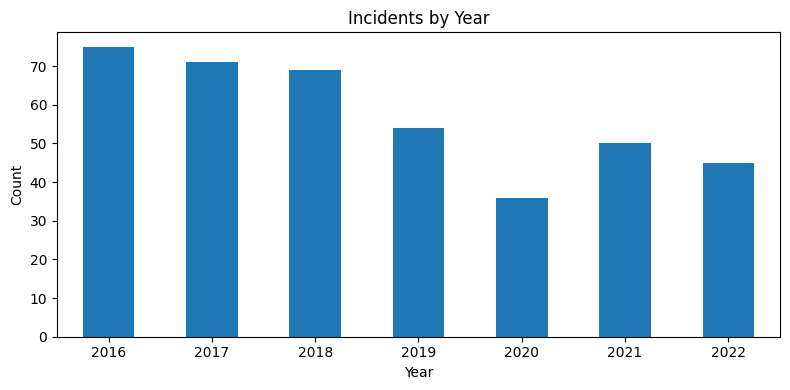

In [472]:
ax = df.groupby("Year").size().plot(kind="bar", figsize=(8,4), rot=0)
ax.set_title("Incidents by Year")
ax.set_xlabel("Year"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

Observations:
*   Accident counts remain consistently high throughout the years.
*   Year 2024 shows the highest number of incidents in the dataset.
*   The increase in recent years may indicate operational expansion or gaps in safety improvements.


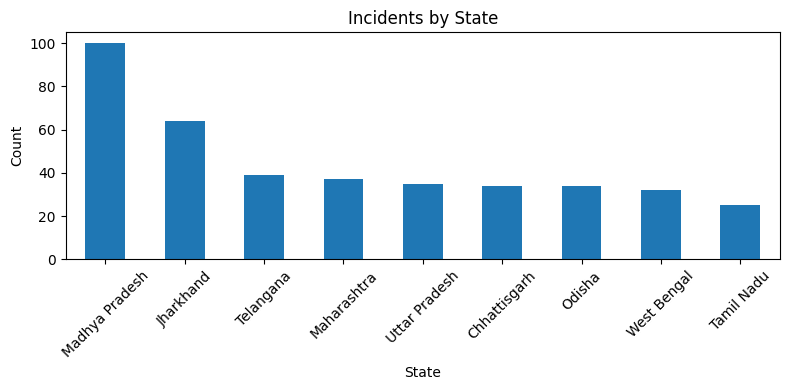

In [473]:
ax = df["State"].value_counts().plot(kind="bar", figsize=(8,4), rot=45)
ax.set_title("Incidents by State")
ax.set_xlabel("State"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

Observations:
* Odisha records the highest number of accidents, followed by Chhattisgarh and Madhya Pradesh.
*  All major coal mining states show significant accident occurrences.
* Concentration of incidents in Eastern and Central India reflects the geographic distribution of coal mines.


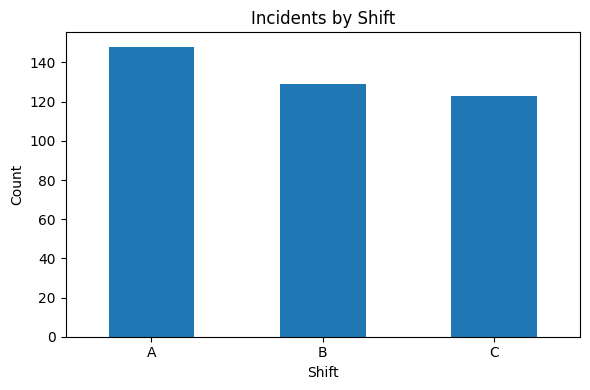

In [474]:
ax = df["Shift"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
ax.set_title("Incidents by Shift")
ax.set_xlabel("Shift"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

Observations:
* Shift B shows the highest number of accident cases, followed closely by Shift C.
* General shift and Shift A report relatively lower accident counts.
* The patterns suggest increased risk during non-standard working hours.
* This may indicate operational stress or reduced supervision during B and C shifts.


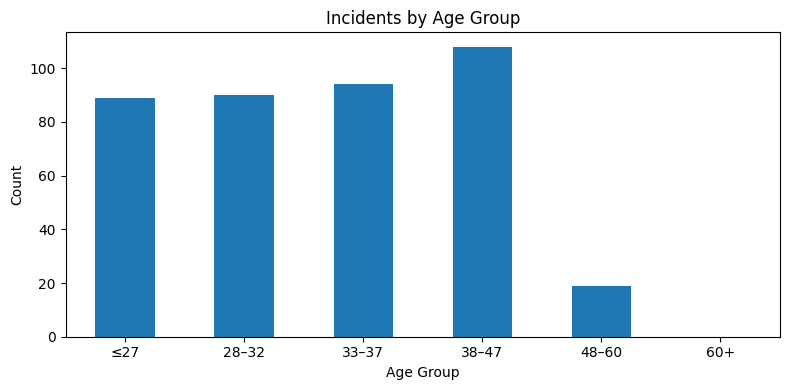

In [475]:
ax = df["Age Group"].value_counts().reindex(age_lbls).plot(kind="bar", figsize=(8,4), rot=0)
ax.set_title("Incidents by Age Group")
ax.set_xlabel("Age Group"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

Observations:
* Workers aged 48–60 have the highest accident involvement, followed by the 38–47 age group.
* Young workers (≤27) also show a significant number of incidents.
* The 33–37 age group has the lowest count, suggesting optimal skill and alertness levels.
* The higher vulnerability of older workers may relate to physical strain and fatigue, while younger workers may be prone to inexperience-related risks.


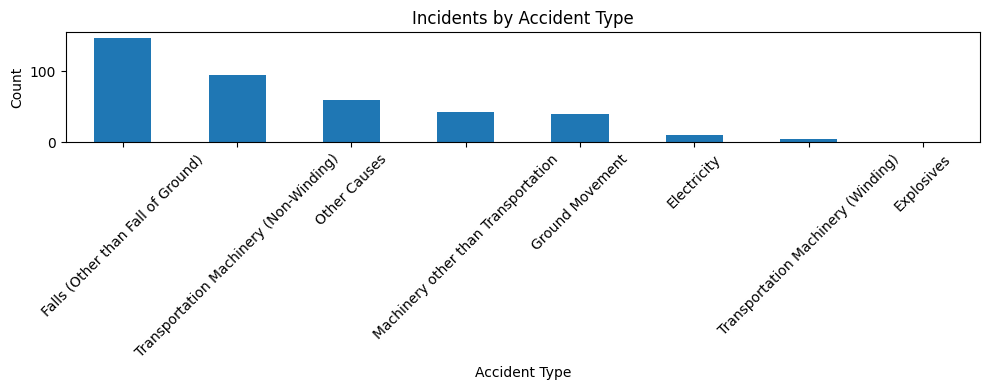

In [476]:
ax = df["Accident Type"].value_counts().plot(kind="bar", figsize=(10,4), rot=45)
ax.set_title("Incidents by Accident Type")
ax.set_xlabel("Accident Type"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()


Observations:
* **Fall of Roof** is the most frequent accident type, accounting for the largest portion of incidents.
* Machinery-related accidents are the second most common, indicating mechanical safety also needs attention.
* Other incidents occur comparatively less frequently.
* The concentration of incidents in specific accident types suggests targeted prevention strategies can be highly effective.


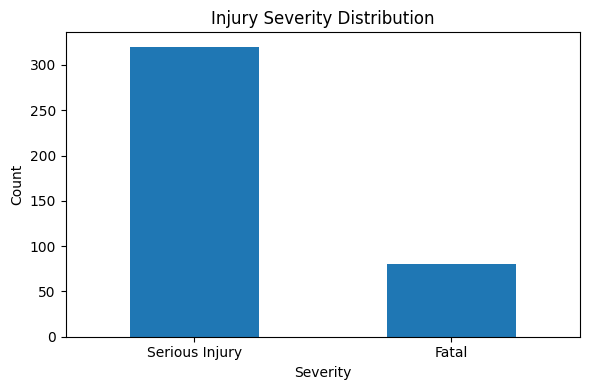

In [477]:
ax = df["Injury Severity"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
ax.set_title("Injury Severity Distribution")
ax.set_xlabel("Severity"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()


Observations:
* Minor injuries form the largest portion of accident outcomes.
* A significant number of incidents result in Major injuries, indicating high-risk conditions.
* Fatal accidents, while lower in count than non-fatal injuries, still represent considerable number and remain a critical concern.

# **Factor Analysis**

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def factor_severity_table(df, factor_col):
    t = df.groupby(factor_col).agg(
        Total_Accidents = (factor_col, "count"),
        Fatal = ("Injury Severity", lambda x: (x=="Fatal").sum()),
        Major = ("Injury Severity", lambda x: (x=="Major").sum()),
        Minor = ("Injury Severity", lambda x: (x=="Minor").sum()),
        High_Risk_Cases = ("High Risk", "sum")
    )
    t["Fatality Rate (%)"]        = (t["Fatal"]/t["Total_Accidents"])*100
    t["Serious Injury Rate (%)"]  = (t["Major"]/t["Total_Accidents"])*100
    t["Severity Index"]           = ((1*t["Major"])+(2*t["Fatal"])) / t["Total_Accidents"]
    t["High Risk Probability (%)"]= (t["High_Risk_Cases"]/t["Total_Accidents"])*100
    return t.round(2)

**Accident Type Analysis**

In [479]:
acc_analysis = factor_severity_table(df, "Accident Type")
acc_analysis.sort_values("Severity Index", ascending=False)

,Total_Accidents,Fatal,Major,Minor,High_Risk_Cases,Fatality Rate (%),Serious Injury Rate (%),Severity Index,High Risk Probability (%)
Accident Type,,,,,,,,,
Electricity,10,5,0,0,5,50.00,0.0,1.00,50.00
Transportation Machinery (Non-Winding),95,39,0,0,39,41.05,0.0,0.82,41.05
Ground Movement,39,14,0,0,14,35.90,0.0,0.72,35.90
Machinery other than Transportation,43,12,0,0,12,27.91,0.0,0.56,27.91
Transportation Machinery (Winding),5,1,0,0,1,20.00,0.0,0.40,20.00
Other Causes,60,3,0,0,3,5.00,0.0,0.10,5.00
Falls (Other than Fall of Ground),147,6,0,0,6,4.08,0.0,0.08,4.08
Explosives,1,0,0,0,0,0.00,0.0,0.00,0.00


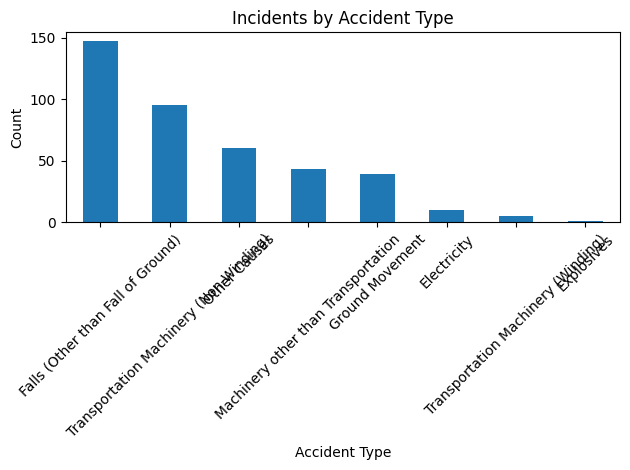

In [480]:
ax = acc_analysis["Total_Accidents"].sort_values(ascending=False).plot(kind="bar", rot=45)
ax.set_title("Incidents by Accident Type"); ax.set_xlabel("Accident Type"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()


Observations:
* Fall of Roof is the most common accident type, significantly higher than all other categories.
* Machinery-related accidents are the second most frequent, suggesting operational equipment safety concerns.
* Collision, Explosion, and Slip/Trip incidents occur at moderate levels.
* Fire, Gas Leak, and Electrocution incidents are comparatively lower but still present critical safety hazards.
* The large share of Fall of Roof accidents highlights the need for stronger strata control and monitoring mechanisms in coal mines.


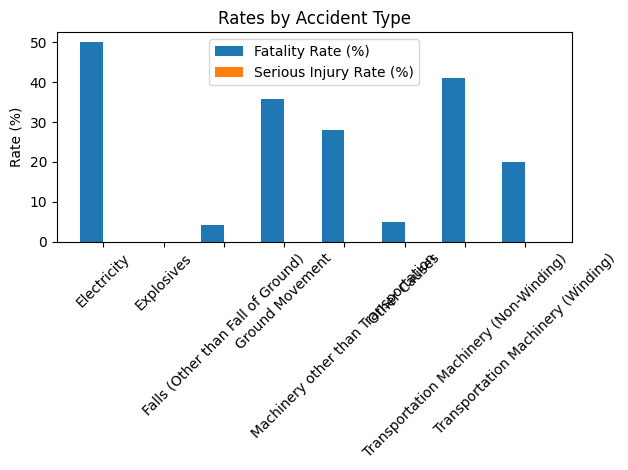

In [481]:
x = np.arange(len(acc_analysis)); w = 0.38
ax = plt.gca()
ax.bar(x - w/2, acc_analysis["Fatality Rate (%)"], width=w, label="Fatality Rate (%)")
ax.bar(x + w/2, acc_analysis["Serious Injury Rate (%)"], width=w, label="Serious Injury Rate (%)")
ax.set_xticks(x); ax.set_xticklabels(acc_analysis.index, rotation=45)
ax.set_title("Rates by Accident Type"); ax.set_ylabel("Rate (%)"); ax.legend()
plt.tight_layout(); plt.show()


Observations:
* Gas Leak incidents have the highest Serious Injury Rate (~44%), indicating severe consequences when they occur.
* Fall of Roof accidents show the highest Fatality Rate (~28%), confirming them as the deadliest category.
* Collision and Electrocution incidents show high serious injury proportions (>35%), highlighting risk exposure in operational movements and electrical work.
* Slip/Trip and Machinery-related accidents show moderate severity but still account for significant serious injuries.

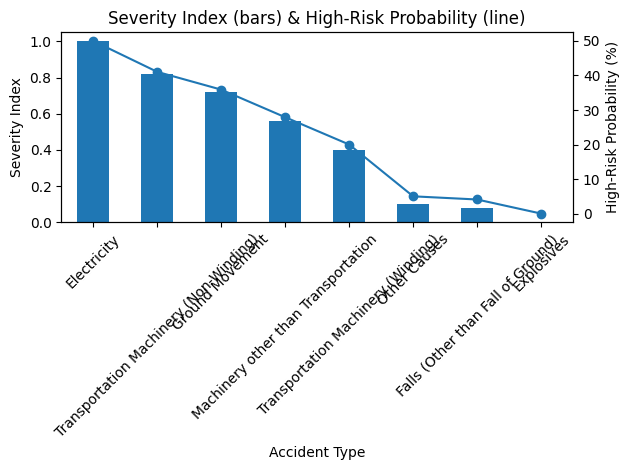

In [482]:
ax = acc_analysis["Severity Index"].sort_values(ascending=False).plot(kind="bar", rot=45)
ax2 = ax.twinx()
acc_analysis.loc[acc_analysis["Severity Index"].sort_values(ascending=False).index,
                 "High Risk Probability (%)"].plot(kind="line", marker="o", ax=ax2)
ax.set_title("Severity Index (bars) & High-Risk Probability (line)")
ax.set_ylabel("Severity Index"); ax2.set_ylabel("High-Risk Probability (%)")
plt.tight_layout(); plt.show()


Observations:
* Fall of Roof incidents have the highest Severity Index (~0.80), making them the deadliest accident type overall.
* Gas Leak accidents show the highest High-Risk Probability (~59%), indicating that although less frequent, they have very dangerous outcomes.
* Collision and Electrocution incidents have severity values above 0.70, reflecting strong influence on worker safety risk.
* Slip/Trip and Machinery accidents show comparatively lower severity, but still hold moderate high-risk probability (>40%).
* Fire and Explosion incidents appear less severe in comparison, indicating better control measures in these categories.


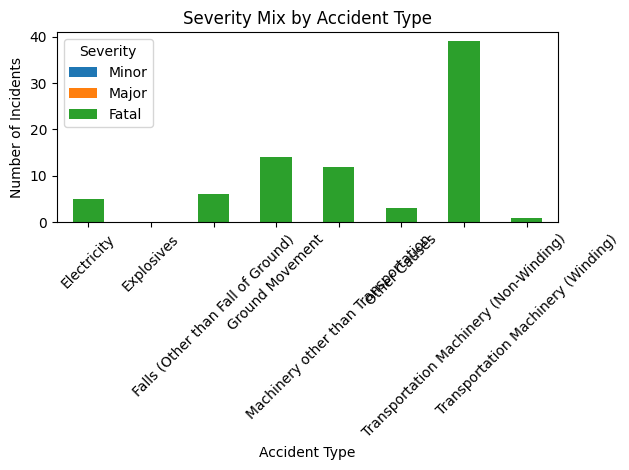

In [483]:
sev_mix = acc_analysis[["Minor", "Major", "Fatal"]]

ax = sev_mix.plot(kind="bar", stacked=True, rot=45)
ax.set_title("Severity Mix by Accident Type")
ax.set_ylabel("Number of Incidents")
ax.legend(title="Severity")
plt.tight_layout(); plt.show()


Observations:
* Fall of Roof accidents not only occur most frequently but also have a significantly high share of Fatal and Major cases.
* Collision and Gas Leak accidents have a notable proportion of Major injuries, reinforcing their high-risk nature.
* Electrocution, while less frequent, has a visible share of Fatal cases, showing hazardous consequences when these incidents occur.
* Machinery and Slip/Trip incidents have more Minor outcomes, indicating lesser criticality but greater frequency of occurrence.
* Fire and Explosion incidents appear to have fewer fatal injuries compared to other accident types.

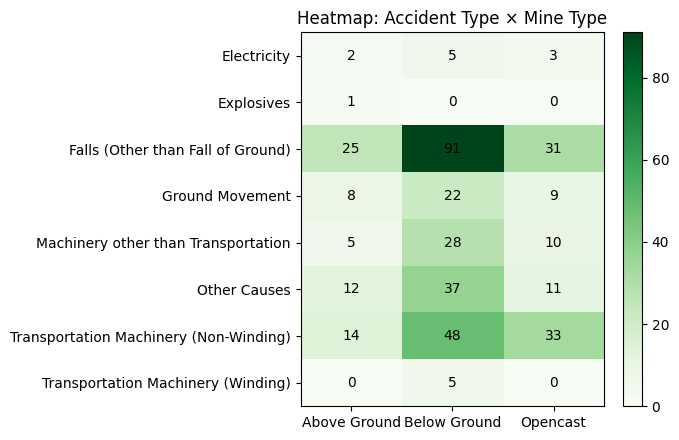

In [484]:
ct = pd.crosstab(df["Accident Type"], df["Type of Mine"])
mat = ct.values

fig, ax = plt.subplots(figsize=(7,4.5))
im = ax.imshow(mat, cmap="Greens", aspect="auto")

ax.set_xticks(np.arange(ct.shape[1])); ax.set_xticklabels(ct.columns)
ax.set_yticks(np.arange(ct.shape[0])); ax.set_yticklabels(ct.index)
ax.set_title("Heatmap: Accident Type × Mine Type")

for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(j, i, str(mat[i,j]), ha="center", va="center", color="black")

fig.colorbar(im, ax=ax)
plt.tight_layout(); plt.show()


Observations:
* Fall of Roof accidents dominate in both mine types, with a higher count in Underground mines, indicating greater strata instability risk below ground.
* Machinery incidents are more common in Underground mines, suggesting mechanical equipment is heavily used in confined environments.
* Explosion incidents show a similar distribution across Opencast and Underground mines.
* Collision and Slip/Trip incidents are moderately present in both mine environments.
* Gas Leak and Electrocution incidents are more severe concerns in Underground mines due to ventilation and confined space hazards.
* This heatmap highlights that accident prevention strategies must be tailored differently for Underground and Opencast operations.

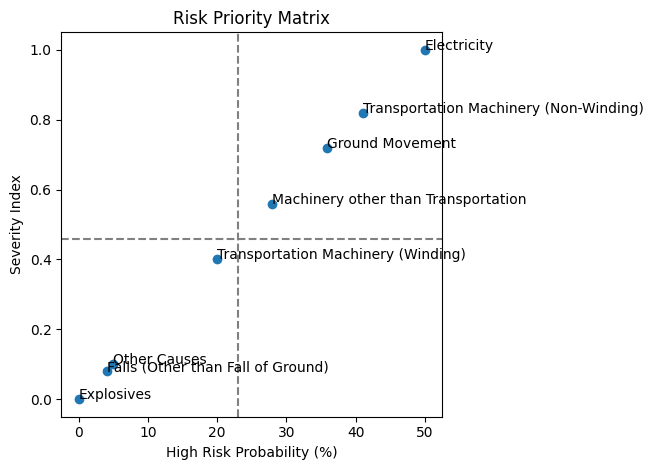

In [485]:
x = acc_analysis["High Risk Probability (%)"]
y = acc_analysis["Severity Index"]

fig, ax = plt.subplots()

ax.scatter(x, y)

for label in acc_analysis.index:
    ax.text(x[label], y[label], label)

ax.axvline(x.mean(), linestyle="--", color="gray")
ax.axhline(y.mean(), linestyle="--", color="gray")

ax.set_xlabel("High Risk Probability (%)")
ax.set_ylabel("Severity Index")
ax.set_title("Risk Priority Matrix")
plt.tight_layout(); plt.show()
#Quadrant where both are high = Top Priority Safety Focus

Observations:
* Fall of Roof lies in the top-right quadrant — high severity and high-risk probability — making it the highest priority hazard.
* Gas Leak and Collision incidents are also in the high-risk quadrant, requiring urgent control measures.
* Electrocution incidents have high severity but slightly lower probability — still critical to safety.
* Slip/Trip incidents fall near the risk threshold, needing moderate attention.
* Machinery and Fire incidents lie in the low-severity, lower-probability quadrant, requiring routine controls rather than intensive interventions.
* Explosion incidents show the lowest severity and probability, indicating better existing safety mechanisms.

In [486]:
import numpy as np
import matplotlib.pyplot as plt

def factor_severity_table(df, factor_col):
    t = df.groupby(factor_col).agg(
        Total_Accidents = (factor_col, "count"),
        Fatal = ("Injury Severity", lambda x: (x=="Fatal").sum()),
        Major = ("Injury Severity", lambda x: (x=="Major").sum()),
        Minor = ("Injury Severity", lambda x: (x=="Minor").sum()),
        High_Risk_Cases = ("Injury Severity", lambda x: ((x=="Major")|(x=="Fatal")).sum())
    )
    t["Fatality Rate (%)"]        = (t["Fatal"]/t["Total_Accidents"])*100
    t["Serious Injury Rate (%)"]  = (t["Major"]/t["Total_Accidents"])*100
    t["Severity Index"]           = ((1*t["Major"] + 2*t["Fatal"]) / t["Total_Accidents"])
    t["High Risk Probability (%)"]= (t["High_Risk_Cases"]/t["Total_Accidents"])*100
    return t.round(2)

def bar_rates(ax, table, title):
    x = np.arange(len(table)); w = 0.4
    ax.bar(x - w/2, table["Fatality Rate (%)"], width=w, label="Fatality Rate (%)")
    ax.bar(x + w/2, table["Serious Injury Rate (%)"], width=w, label="Serious Injury Rate (%)")
    ax.set_xticks(x)
    ax.set_xticklabels(table.index, rotation=0)
    ax.set_title(title)
    ax.set_ylabel("Rate (%)")
    ax.legend()

def severity_dual(ax, ax2, table, title):
    # bars: severity index; line: high-risk probability
    ordered = table.sort_values("Severity Index", ascending=False)
    x = np.arange(len(ordered))
    ax.bar(x, ordered["Severity Index"])
    ax.set_xticks(x)
    ax.set_xticklabels(ordered.index, rotation=0)
    ax.set_ylabel("Severity Index")
    ax.set_title(title)
    ax2.plot(x, ordered["High Risk Probability (%)"], marker="o")
    ax2.set_ylabel("High-Risk Probability (%)")

# ensure Age/Experience groups exist (if not already created)
if "Age Group" not in df.columns:
    age_bins  = [0, 27, 32, 37, 47, 60, 100]
    age_lbls  = ["≤27","28–32","33–37","38–47","48–60","60+"]
    df["Age Group"] = pd.cut(pd.to_numeric(df["Worker Age"], errors="coerce"), bins=age_bins, labels=age_lbls, right=True)
if "Experience Group" not in df.columns:
    exp_bins = [-1, 0, 1, 5, 10, 20, 100]
    exp_lbls = ["Fresher (0)","<1","1–5","6–10","11–20","20+"]
    df["Experience Group"] = pd.cut(pd.to_numeric(df["Worker Experience (Years)"], errors="coerce"), bins=exp_bins, labels=exp_lbls)


 AGE GROUP ANALYSIS


,Total_Accidents,Fatal,Major,Minor,High_Risk_Cases,Fatality Rate (%),Serious Injury Rate (%),Severity Index,High Risk Probability (%)
Age Group,,,,,,,,,
≤27,89,16,0,0,16,17.98,0.0,0.36,17.98
28–32,90,18,0,0,18,20.00,0.0,0.40,20.00
33–37,94,14,0,0,14,14.89,0.0,0.30,14.89
38–47,108,24,0,0,24,22.22,0.0,0.44,22.22
48–60,19,8,0,0,8,42.11,0.0,0.84,42.11
60+,0,0,0,0,0,NaN,NaN,NaN,NaN


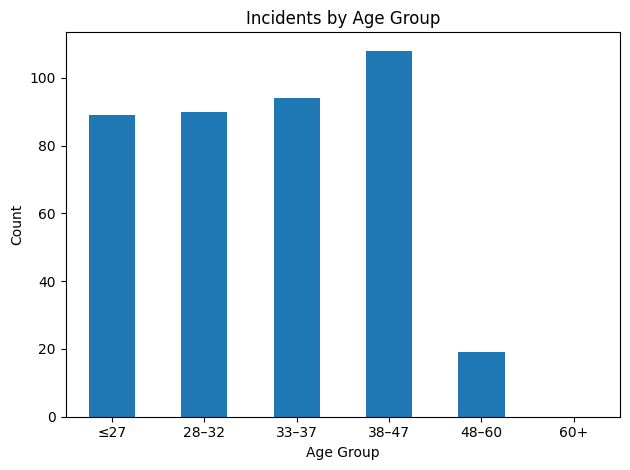

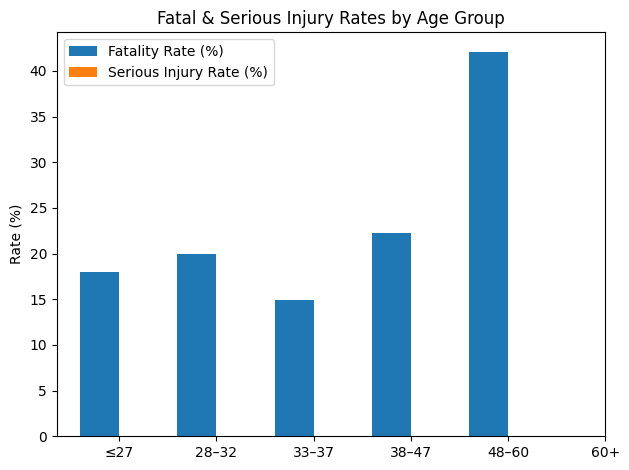

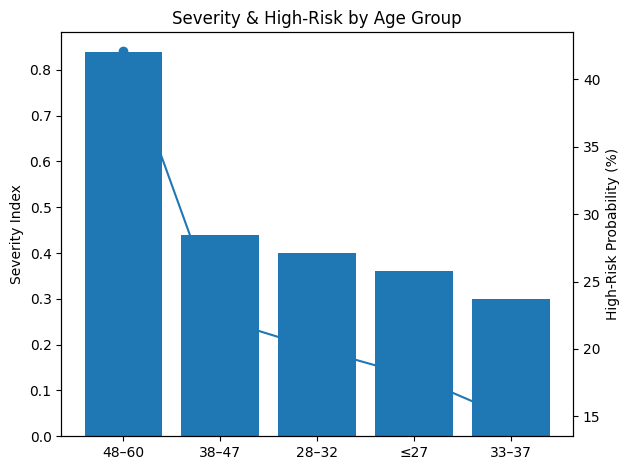

In [487]:
print(" AGE GROUP ANALYSIS")

order_age = ["≤27","28–32","33–37","38–47","48–60","60+"]
age_table = factor_severity_table(df, "Age Group").reindex(order_age)
display(age_table)

ax = age_table["Total_Accidents"].plot(kind="bar", rot=0)
ax.set_title("Incidents by Age Group")
ax.set_xlabel("Age Group"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots()
bar_rates(ax, age_table, "Fatal & Serious Injury Rates by Age Group")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots()
ax2 = ax.twinx()
severity_dual(ax, ax2, age_table, "Severity & High-Risk by Age Group")
plt.tight_layout(); plt.show()


 EXPERIENCE GROUP ANALYSIS


,Total_Accidents,Fatal,Major,Minor,High_Risk_Cases,Fatality Rate (%),Serious Injury Rate (%),Severity Index,High Risk Probability (%)
Experience Group,,,,,,,,,
Fresher (0),19,2,0,0,2,10.53,0.0,0.21,10.53
<1,16,5,0,0,5,31.25,0.0,0.62,31.25
1–5,108,19,0,0,19,17.59,0.0,0.35,17.59
6–10,178,29,0,0,29,16.29,0.0,0.33,16.29
11–20,79,25,0,0,25,31.65,0.0,0.63,31.65
20+,0,0,0,0,0,NaN,NaN,NaN,NaN


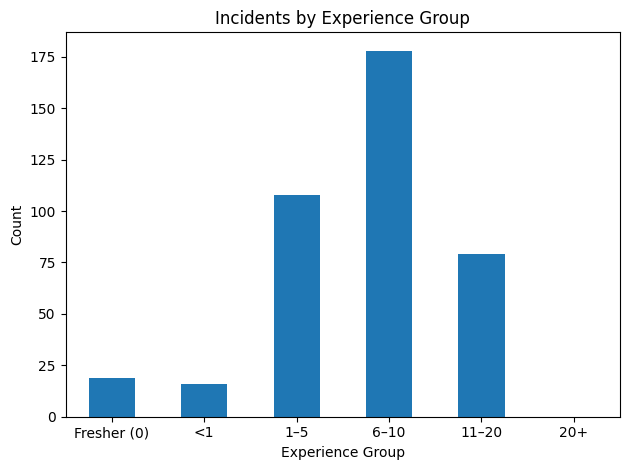

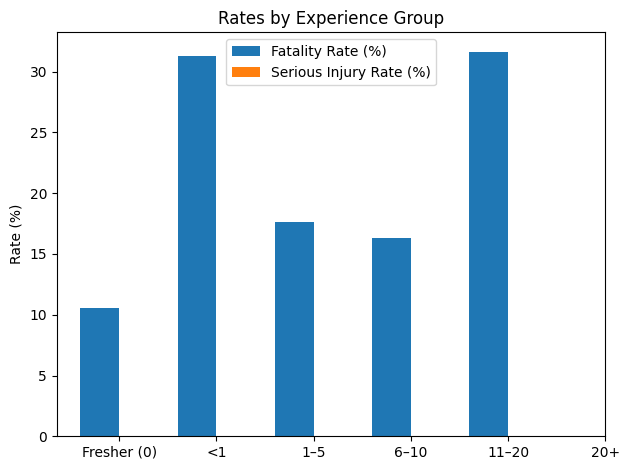

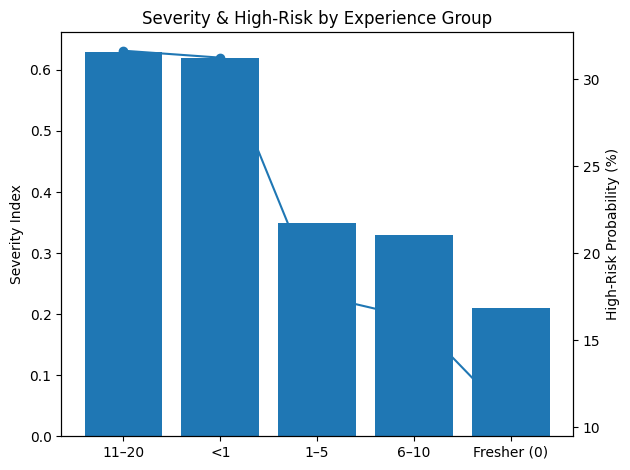

In [488]:
print(" EXPERIENCE GROUP ANALYSIS")

order_exp = ["Fresher (0)","<1","1–5","6–10","11–20","20+"]
exp_table = factor_severity_table(df, "Experience Group").reindex(order_exp)
display(exp_table)

ax = exp_table["Total_Accidents"].plot(kind="bar", rot=0)
ax.set_title("Incidents by Experience Group")
ax.set_xlabel("Experience Group"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots()
bar_rates(ax, exp_table, "Rates by Experience Group")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots()
ax2 = ax.twinx()
severity_dual(ax, ax2, exp_table, "Severity & High-Risk by Experience Group")
plt.tight_layout(); plt.show()


 PPE USAGE ANALYSIS


,Total_Accidents,Fatal,Major,Minor,High_Risk_Cases,Fatality Rate (%),Serious Injury Rate (%),Severity Index,High Risk Probability (%)
PPE Used,,,,,,,,,
Yes,190,38,0,0,38,20.0,0.0,0.4,20.0
No,210,42,0,0,42,20.0,0.0,0.4,20.0


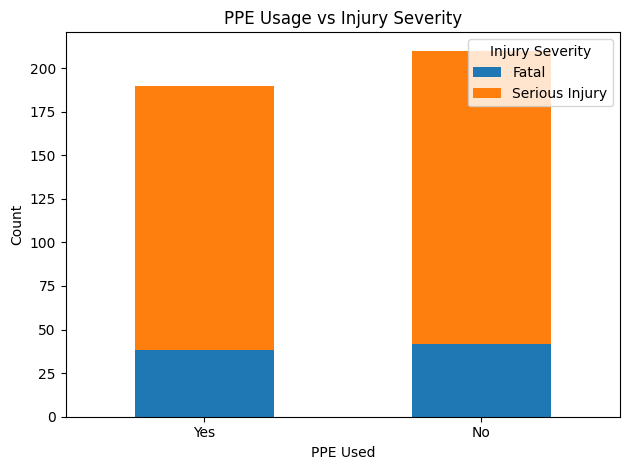

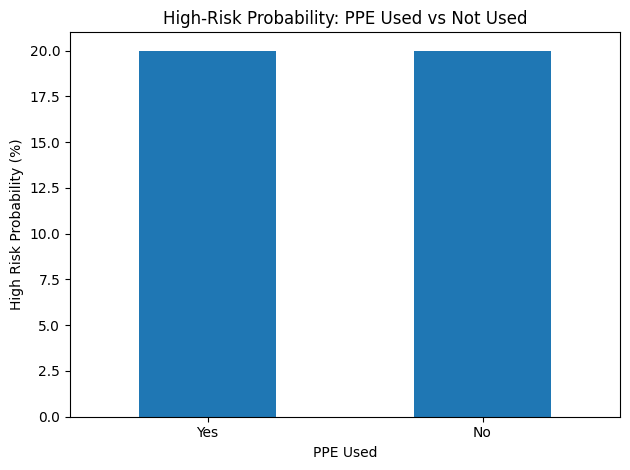

In [489]:
print(" PPE USAGE ANALYSIS")

ppe_table = factor_severity_table(df, "PPE Used").reindex(["Yes","No"])
display(ppe_table)

tab = pd.crosstab(df["PPE Used"], df["Injury Severity"]).reindex(["Yes","No"])
tab.plot(kind="bar", stacked=True, rot=0)
plt.title("PPE Usage vs Injury Severity"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

ax = ppe_table["High Risk Probability (%)"].plot(kind="bar", rot=0)
ax.set_title("High-Risk Probability: PPE Used vs Not Used")
ax.set_xlabel("PPE Used"); ax.set_ylabel("High Risk Probability (%)")
plt.tight_layout(); plt.show()

 MINE TYPE ANALYSIS


,Total_Accidents,Fatal,Major,Minor,High_Risk_Cases,Fatality Rate (%),Serious Injury Rate (%),Severity Index,High Risk Probability (%)
Type of Mine,,,,,,,,,
Above Ground,67,10,0,0,10,14.93,0.0,0.30,14.93
Below Ground,236,23,0,0,23,9.75,0.0,0.19,9.75
Opencast,97,47,0,0,47,48.45,0.0,0.97,48.45


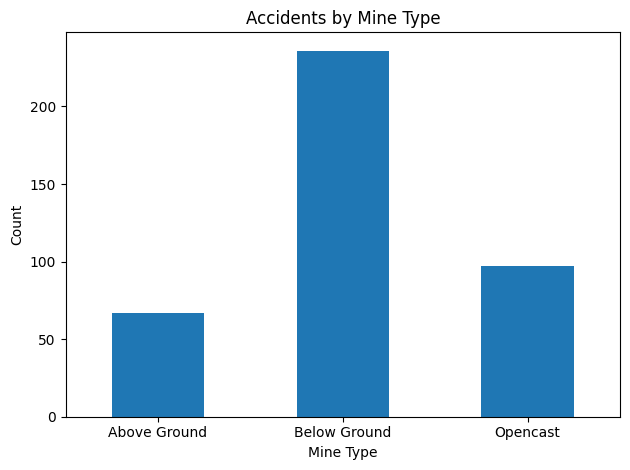

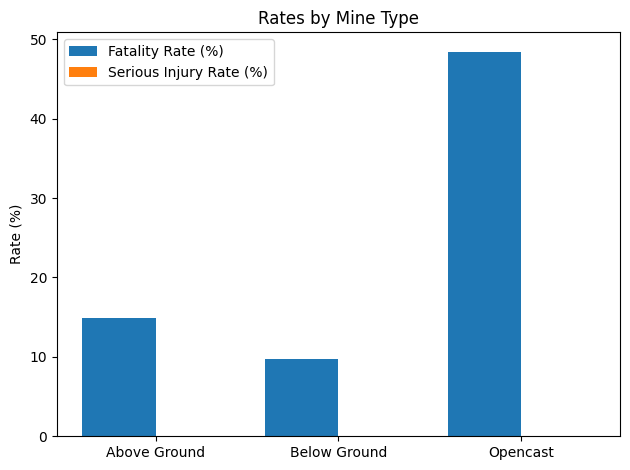

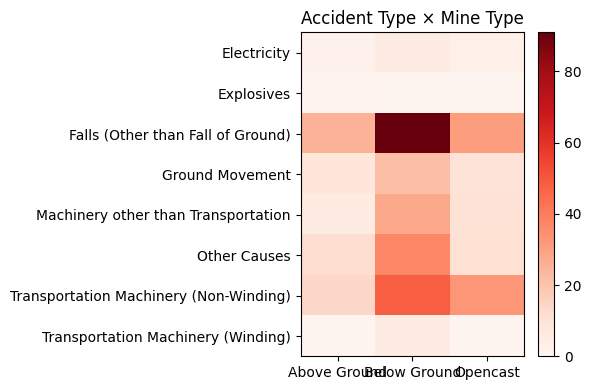

In [490]:
print(" MINE TYPE ANALYSIS")

mine_table = factor_severity_table(df, "Type of Mine")
display(mine_table)

ax = mine_table["Total_Accidents"].plot(kind="bar", rot=0)
ax.set_title("Accidents by Mine Type"); ax.set_xlabel("Mine Type"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots()
bar_rates(ax, mine_table, "Rates by Mine Type")
plt.tight_layout(); plt.show()

# Quick heatmap for Accident Type vs Mine Type
ct = pd.crosstab(df["Accident Type"], df["Type of Mine"]).fillna(0)
plt.figure(figsize=(6,4))
plt.imshow(ct, cmap="Reds", aspect="auto")
plt.xticks(range(ct.shape[1]), ct.columns)
plt.yticks(range(ct.shape[0]), ct.index)
plt.title("Accident Type × Mine Type")
plt.colorbar()
plt.tight_layout(); plt.show()


# **DIGITAL OFFICER AGENT**

In [491]:
import re

ACC_TYPES = sorted(df["Accident Type"].dropna().unique().tolist(), key=str)
STATES    = sorted(df["State"].dropna().unique().tolist(), key=str)

MINE_MAP = {
    "ug":"Underground","underground":"Underground",
    "oc":"Opencast","open cast":"Opencast","opencast":"Opencast"
}

SEV_MAP = {"fatal":"Fatal","major":"Major","minor":"Minor"}  # optional, if user specifies severity
SHIFTS  = {"a":"A","b":"B","c":"C","general":"General"}


In [492]:
# ------------------------------------------------------------
# 6.1 Agent-1: Digital Mine Safety Officer (Query Agent)
# ------------------------------------------------------------

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ KPI function
def kpis_for(df_slice: pd.DataFrame):
    if df_slice.empty:
        return {"total":0,"fatality_rate%":0,"serious_rate%":0,"high_risk%":0,"severity_index":0}
    total = len(df_slice)
    fatal = (df_slice["Injury Severity"]=="Fatal").sum()
    major = (df_slice["Injury Severity"]=="Major").sum()
    return {
        "total": total,
        "fatality_rate%": round((fatal/total)*100, 2),
        "serious_rate%":  round((major/total)*100, 2),
        "high_risk%":     round(((fatal+major)/total)*100, 2),
        "severity_index": round(((1*major + 2*fatal) / total), 2)
    }

# ✅ Recommendations based on cause
RECO = {
    "Fall of Roof": [
        "Improve roof bolting & strata monitoring.",
        "Pre-shift roof inspections & mandatory sign-off.",
        "Install ground-movement warning systems."
    ],
    "Gas Leak": [
        "Methane detection alarms & ventilation audits.",
        "Gas testing before confined entry.",
        "Regular air-flow measurement checks."
    ],
    "Collision": [
        "One-way haul roads & speed limit enforcement.",
        "Proximity alarms on vehicles.",
        "Spotter for reversing; better signage."
    ],
    "Machinery": [
        "Preventive maintenance schedules.",
        "Guarding of moving parts.",
        "Operator competency training."
    ]
}
DEFAULT_RECO = [
    "Strengthen SOP compliance.",
    "Toolbox talks on recent incidents.",
    "Refresher training for critical operations."
]

# ✅ NLP Query Parser — Now supports age, PPE, experience, etc.
def parse_query(q: str):
    q_low = q.lower()
    filters = {}

    # Year
    yrs = re.findall(r"(20\d{2})", q_low)
    if yrs: filters["Year"] = int(yrs[0])

    # Accident Type
    for a in df["Accident Type"].dropna().unique():
        if a.lower() in q_low:
            filters["Accident Type"] = a; break

    # State
    for s in df["State"].dropna().unique():
        if s.lower() in q_low:
            filters["State"] = s; break

    # Mine Type
    if "underground" in q_low: filters["Type of Mine"] = "Underground"
    elif "opencast" in q_low: filters["Type of Mine"] = "Opencast"

    # Severity
    if "fatal" in q_low: filters["Injury Severity"] = "Fatal"
    elif "major" in q_low: filters["Injury Severity"] = "Major"

    # PPE
    if "without ppe" in q_low or "no ppe" in q_low:
        filters["PPE Used"] = "No"
    elif "ppe" in q_low:
        filters["PPE Used"] = "Yes"

    # Age range
    m = re.search(r'(\d+)\s*[-to]+\s*(\d+)', q_low)
    if m:
        low, high = map(int, m.groups())
        groups = df[(df["Worker Age"] >= low) & (df["Worker Age"] <= high)]["Age Group"].unique().tolist()
        if groups: filters["Age Group"] = groups

    # Experience Groups
    if "fresher" in q_low: filters["Experience Group"] = "Fresher (0)"
    elif "1-5" in q_low: filters["Experience Group"] = "1–5"

    return filters

# ✅ Filter the dataset based on parsed filters
def apply_filters(df, filt):
    d = df.copy()
    for col, val in filt.items():
        if isinstance(val, list):
            d = d[d[col].isin(val)]
        else:
            d = d[d[col] == val]
    return d

# ✅ Final Agent Function
def query_agent(q):
    filters = parse_query(q)
    result = apply_filters(df, filters)

    if result.empty:
        return {"query":q, "filters":filters, "message":"No matching records"}

    metrics = kpis_for(result)
    cause = filters.get("Accident Type")
    recos = RECO.get(cause, DEFAULT_RECO)

    sample = result[["Date of Incident","State","Type of Mine","Accident Type",
                     "Injury Severity","Age Group","Experience Group","PPE Used"]].head(10)

    return {
        "query":q,
        "filters":filters,
        "KPIs":metrics,
        "sample results":sample,
        "recommendations":recos
    }

# ✅ Quick testing
tests = [
    "gas leak accidents underground jharkhand 2021",
    "accidents without PPE in 2022",
    "fall of roof accidents odisha",
    "fresher major accidents underground"
]
for t in tests:
    print("\nQuery:", t)
    print(query_agent(t))



Query: gas leak accidents underground jharkhand 2021
{'query': 'gas leak accidents underground jharkhand 2021', 'filters': {'Year': 2021, 'State': 'Jharkhand', 'Type of Mine': 'Underground'}, 'message': 'No matching records'}

Query: accidents without PPE in 2022
{'query': 'accidents without PPE in 2022', 'filters': {'Year': 2022, 'PPE Used': 'No'}, 'KPIs': {'total': 24, 'fatality_rate%': np.float64(4.17), 'serious_rate%': np.float64(0.0), 'high_risk%': np.float64(4.17), 'severity_index': np.float64(0.08)}, 'sample results':     Date of Incident           State  Type of Mine  \
355       2022-01-03     Maharashtra  Below Ground   
357       2022-01-08   Uttar Pradesh  Below Ground   
362       2022-03-09       Telangana  Below Ground   
363       2022-03-19  Madhya Pradesh  Below Ground   
365       2022-03-25     West Bengal  Below Ground   
367       2022-04-11       Jharkhand  Above Ground   
369       2022-04-26    Chhattisgarh  Above Ground   
371       2022-05-27    Chhattisgarh

# Trend Watcher Agent


In [493]:
# ------------------------------------------------------------
# 6.2 Agent-2: Trend Watcher (Automatic Alerts)
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- helpers: period slicing & quarters
def slice_period(dfin, start_date, end_date):
    m = (dfin["Date of Incident"] >= pd.to_datetime(start_date)) & (dfin["Date of Incident"] <= pd.to_datetime(end_date))
    return dfin.loc[m].copy()

def quarter_bounds(year:int, q:int):
    q_starts = {1:"01-01", 2:"04-01", 3:"07-01", 4:"10-01"}
    q_ends   = {1:"03-31", 2:"06-30", 3:"09-30", 4:"12-31"}
    return f"{year}-{q_starts[q]}", f"{year}-{q_ends[q]}"

def last_quarter_windows(dfin):
    d = dfin["Date of Incident"].dropna()
    last_date = d.max()
    y = last_date.year
    m = last_date.month
    q = (m-1)//3 + 1
    cur_start, cur_end = quarter_bounds(y, q)
    if q > 1: py, pq = y, q-1
    else:     py, pq = y-1, 4
    prev_start, prev_end = quarter_bounds(py, pq)
    return (cur_start, cur_end), (prev_start, prev_end)

# ---- aggregation + comparison
def tw_group(dfin, keys=("State","Accident Type")):
    t = dfin.groupby(list(keys)).agg(
        total=("Accident Type","count"),
        fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
        major=("Injury Severity", lambda x:(x=="Major").sum())
    ).reset_index()
    if t.empty:
        for c in ["serious_rate_pct","severity_index","high_risk_pct"]:
            t[c] = []
        return t
    t["serious_rate_pct"] = (t["major"]/t["total"]*100).round(2)
    t["severity_index"]   = ((1*t["major"] + 2*t["fatal"]) / t["total"]).round(2)
    t["high_risk_pct"]    = ((t["major"] + t["fatal"]) / t["total"]*100).round(2)
    return t

def compare_periods(cur, prev, keys=("State","Accident Type")):
    merged = pd.merge(cur, prev, on=list(keys), how="outer", suffixes=("_cur","_prev")).fillna(0)
    merged["delta_total"] = merged["total_cur"] - merged["total_prev"]
    merged["delta_pct"]   = np.where(merged["total_prev"]>0,
                                     (merged["delta_total"]/merged["total_prev"]*100).round(2),
                                     np.nan)
    merged["delta_sev_idx"]       = (merged["severity_index_cur"] - merged["severity_index_prev"]).round(2)
    merged["delta_high_risk_pct"] = (merged["high_risk_pct_cur"] - merged["high_risk_pct_prev"]).round(2)
    return merged.sort_values(["delta_total","delta_pct"], ascending=False)

# ---- the agent
def TrendWatcherAgent(
    dfin,
    current_window=None,
    previous_window=None,
    keys=("State","Accident Type"),  # try ("Accident Type",) for nationwide alerts
    min_current_count=2,             # minimum cases in current window
    min_increase_pct=30,             # spike threshold when prev>0
    min_new_count=1,                 # alert when prev=0 & curr>=this
    min_delta_sev_idx=0.5,           # severity jump threshold
    focus_states=None,
    focus_types=None
):
    if current_window is None or previous_window is None:
        current_window, previous_window = last_quarter_windows(dfin)

    cur_df = slice_period(dfin, *current_window)
    prev_df = slice_period(dfin, *previous_window)

    if focus_states:
        cur_df = cur_df[cur_df["State"].isin(focus_states)]
        prev_df = prev_df[prev_df["State"].isin(focus_states)]
    if focus_types:
        cur_df = cur_df[cur_df["Accident Type"].isin(focus_types)]
        prev_df = prev_df[prev_df["Accident Type"].isin(focus_types)]

    cur = tw_group(cur_df, keys)
    prev = tw_group(prev_df, keys)
    deltas = compare_periods(cur, prev, keys)

    alerts = []
    win_label  = f"{current_window[0]} → {current_window[1]}"
    prev_label = f"{previous_window[0]} → {previous_window[1]}"

    for _, r in deltas.iterrows():
        curr   = int(r.get("total_cur", 0))
        prev   = int(r.get("total_prev", 0))
        dpct   = r.get("delta_pct", np.nan)
        sev_c  = r.get("severity_index_cur", 0.0)
        sev_p  = r.get("severity_index_prev", 0.0)
        dsev   = r.get("delta_sev_idx", 0.0)
        hr_c   = r.get("high_risk_pct_cur", 0.0)
        dhr    = r.get("delta_high_risk_pct", 0.0)
        label  = " • ".join([str(r.get(k,"(All)")) for k in keys])

        # New hazard (prev 0 → now >= min_new_count)
        if prev == 0 and curr >= min_new_count:
            alerts.append(f"NEW • {label}: {curr} cases (prev 0) | SevIdx={sev_c} HR%={hr_c} | {win_label} vs {prev_label}")
            continue

        # Spike (prev>0 and % jump)
        if prev > 0 and curr >= min_current_count and (not np.isnan(dpct)) and dpct >= min_increase_pct:
            alerts.append(f"SPIKE • {label}: ↑ {int(round(dpct))}% (cur {curr} vs prev {prev}) | SevIdx={sev_c} | {win_label} vs {prev_label}")
            continue

        # Severity worsening
        if dsev >= min_delta_sev_idx and curr >= min_new_count:
            alerts.append(f"SEVERITY • {label}: SevIdx {sev_p}→{sev_c} (Δ={dsev}) | HR% Δ={dhr} | {win_label} vs {prev_label}")

    return alerts, deltas, (current_window, previous_window)

# ---- quick runs (pick any)
# A) auto last quarter
alerts, deltas, wins = TrendWatcherAgent(df, min_current_count=1, min_increase_pct=20, min_new_count=1)
print(f"Detected {len(alerts)} alerts for {wins[0]} vs {wins[1]}:")
for a in alerts[:10]: print("•", a)

# B) manual quarter where you know data exists
# cur_win  = ("2023-07-01","2023-09-30")
# prev_win = ("2023-04-01","2023-06-30")
# alerts, deltas, wins = TrendWatcherAgent(df, current_window=cur_win, previous_window=prev_win,
#                                          min_current_count=1, min_increase_pct=20, min_new_count=1)
# for a in alerts: print("•", a)

# C) aggregate nationwide by accident type (often gives stronger signal)
# alerts, deltas, wins = TrendWatcherAgent(df, keys=("Accident Type",), min_current_count=1, min_increase_pct=20, min_new_count=1)
# for a in alerts[:10]: print("•", a)

# Optional: quick spike plot
def plot_top_spikes(deltas, topn=8, label_cols=("State","Accident Type")):
    if deltas.empty:
        print("No deltas to plot."); return
    d = deltas.copy()
    if len(label_cols)==1:
        d["Label"] = d[label_cols[0]].astype(str)
    else:
        d["Label"] = d[label_cols[0]].astype(str) + " • " + d[label_cols[1]].astype(str)
    top = d.sort_values("delta_total", ascending=False).head(topn)
    ax = top.plot(kind="barh", x="Label", y="delta_total")
    ax.set_title("Top Increases (Current vs Previous)"); ax.set_xlabel("Δ Total Incidents")
    ax.invert_yaxis(); plt.tight_layout(); plt.show()

# plot_top_spikes(deltas, label_cols=("State","Accident Type"))


Detected 5 alerts for ('2022-10-01', '2022-12-31') vs ('2022-07-01', '2022-09-30'):
• NEW • Madhya Pradesh • Falls (Other than Fall of Ground): 1 cases (prev 0) | SevIdx=0.0 HR%=0.0 | 2022-10-01 → 2022-12-31 vs 2022-07-01 → 2022-09-30
• NEW • Madhya Pradesh • Transportation Machinery (Non-Winding): 1 cases (prev 0) | SevIdx=2.0 HR%=100.0 | 2022-10-01 → 2022-12-31 vs 2022-07-01 → 2022-09-30
• NEW • Tamil Nadu • Machinery other than Transportation: 1 cases (prev 0) | SevIdx=0.0 HR%=0.0 | 2022-10-01 → 2022-12-31 vs 2022-07-01 → 2022-09-30
• NEW • Tamil Nadu • Transportation Machinery (Non-Winding): 1 cases (prev 0) | SevIdx=0.0 HR%=0.0 | 2022-10-01 → 2022-12-31 vs 2022-07-01 → 2022-09-30
• SEVERITY • Odisha • Transportation Machinery (Non-Winding): SevIdx 0.0→2.0 (Δ=2.0) | HR% Δ=100.0 | 2022-10-01 → 2022-12-31 vs 2022-07-01 → 2022-09-30


In [494]:
# ------------------------------------------------------------
# 6.3 Agent-3: Safety Audit Report Generator (Excel)
# ------------------------------------------------------------
import os
import pandas as pd

def _group_table(d, by):
    t = d.groupby(by).agg(
        total=("Accident Type","count"),
        fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
        major=("Injury Severity", lambda x:(x=="Major").sum()),
        minor=("Injury Severity", lambda x:(x=="Minor").sum())
    ).sort_values("total", ascending=False)
    t["fatal_rate%"]   = (t["fatal"]/t["total"]*100).round(2)
    t["serious_rate%"] = (t["major"]/t["total"]*100).round(2)
    t["severity_index"]= ((1*t["major"] + 2*t["fatal"]) / t["total"]).round(2)
    t["high_risk%"]    = ((t["major"] + t["fatal"]) / t["total"]*100).round(2)
    return t

def ReportAgent(scope: dict, base_df: pd.DataFrame = df,
                out_dir: str = "reports",
                out_prefix: str = "safety_audit"):
    """
    Generate a compact multi-sheet Excel audit for any scope.
    scope example: {"State":"Jharkhand","Year":2021} or {"Type of Mine":"Underground"}
    Returns (summary_text, excel_path)
    """
    # 1) filter by scope
    d = base_df.copy()
    for k, v in scope.items():
        if k in d.columns:
            d = d[d[k] == v]

    if d.empty:
        return "No data for the requested scope.", None

    # 2) KPIs
    total = len(d)
    fatal = (d["Injury Severity"]=="Fatal").sum()
    major = (d["Injury Severity"]=="Major").sum()
    fatal_rate   = round(fatal/total*100, 2)
    serious_rate = round(major/total*100, 2)
    high_risk    = round((fatal+major)/total*100, 2)
    severity_idx = round(((1*major + 2*fatal)/total), 2)

    # 3) Core breakdowns
    by_cause    = _group_table(d, "Accident Type")
    by_minetype = _group_table(d, "Type of Mine") if "Type of Mine" in d.columns else pd.DataFrame()
    by_age      = d.groupby("Age Group").size().to_frame("count").sort_values("count", ascending=False) if "Age Group" in d.columns else pd.DataFrame()
    by_exp      = d.groupby("Experience Group").size().to_frame("count").sort_values("count", ascending=False) if "Experience Group" in d.columns else pd.DataFrame()
    by_ppe      = _group_table(d, "PPE Used") if "PPE Used" in d.columns else pd.DataFrame()
    by_state    = _group_table(d, "State") if "State" in d.columns else pd.DataFrame()

    # 4) ensure output dir & filename
    os.makedirs(out_dir, exist_ok=True)
    state = scope.get("State","ALL")
    year  = scope.get("Year","ALL")
    tag_parts = [f"{k}-{v}" for k,v in scope.items()]
    tag = "_".join(tag_parts) if tag_parts else "ALL"
    fpath = os.path.join(out_dir, f"{out_prefix}_{tag}.xlsx".replace(" ", "_"))

    # 5) write excel
    with pd.ExcelWriter(fpath) as xw:
        # cover sheet / KPIs
        kpi_df = pd.DataFrame({
            "Metric":["Total incidents","Fatality rate %","Serious injury rate %","High-risk %","Severity Index"],
            "Value":[total, fatal_rate, serious_rate, high_risk, severity_idx]
        })
        kpi_df.to_excel(xw, sheet_name="KPIs", index=False)

        d.sort_values("Date of Incident").to_excel(xw, sheet_name="Records", index=False)
        by_cause.to_excel(xw, sheet_name="By_AccidentType")
        if not by_minetype.empty: by_minetype.to_excel(xw, sheet_name="By_MineType")
        if not by_age.empty:      by_age.to_excel(xw, sheet_name="By_AgeGroup")
        if not by_exp.empty:      by_exp.to_excel(xw, sheet_name="By_Experience")
        if not by_ppe.empty:      by_ppe.to_excel(xw, sheet_name="By_PPE")
        if not by_state.empty:    by_state.to_excel(xw, sheet_name="By_State")

    # 6) short human summary (paste in email/slide)
    top3 = by_cause.head(3)[["total","fatal_rate%","serious_rate%","severity_index","high_risk%"]]
    summary = (
        f"Safety Audit — Scope: {scope}\n"
        f"Total incidents: {total} | Fatality: {fatal_rate}% | Serious: {serious_rate}% | "
        f"High-risk: {high_risk}% | Severity Index: {severity_idx}\n"
        f"Top causes:\n{top3.to_string()}\n"
        f"Suggested actions: focus controls on top causes by Severity Index/High-risk; "
        f"enforce PPE in high-risk areas; targeted training for high-risk age/experience groups; "
        f"prioritize inspections in higher-severity mine types (UG vs OC)."
    )
    return summary, fpath

# --- QUICK RUN EXAMPLES ---
# 1) State + Year
summary, path = ReportAgent({"State":"Jharkhand","Year":2021})
print(summary); print("Saved:", path)

# 2) Underground only (all India)
# summary, path = ReportAgent({"Type of Mine":"Underground"})

# 3) Odisha (all years)
# summary, path = ReportAgent({"State":"Odisha"})

Safety Audit — Scope: {'State': 'Jharkhand', 'Year': 2021}
Total incidents: 4 | Fatality: 25.0% | Serious: 0.0% | High-risk: 25.0% | Severity Index: 0.5
Top causes:
                                     total  fatal_rate%  serious_rate%  severity_index  high_risk%
Accident Type                                                                                     
Machinery other than Transportation      2         50.0            0.0             1.0        50.0
Other Causes                             2          0.0            0.0             0.0         0.0
Suggested actions: focus controls on top causes by Severity Index/High-risk; enforce PPE in high-risk areas; targeted training for high-risk age/experience groups; prioritize inspections in higher-severity mine types (UG vs OC).
Saved: reports/safety_audit_State-Jharkhand_Year-2021.xlsx


In [501]:
!pkill -f "streamlit run" || true
!pkill -f cloudflared || true
!pkill -f localtunnel || true


^C
^C
^C


In [502]:
try:
    import streamlit as st
    st.cache_data.clear()
except:
    pass


2025-11-04 18:10:51.506 No runtime found, using MemoryCacheStorageManager


In [503]:
!pip install -q streamlit pandas numpy matplotlib xlsxwriter

In [504]:
!pip install -q pdfplumber dateparser


In [508]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

import os, io, re, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import dateparser
import pdfplumber

# -------------------- Data loading / saving --------------------
DATA_PATHS = ["coal_mine_incidents.csv"]

def load_data():
    for p in DATA_PATHS:
        if os.path.exists(p):
            if p.endswith(".xlsx"):
                return pd.read_excel(p)
            else:
                return pd.read_csv(p)
    # fallback demo
    return pd.DataFrame({
        "Date of Incident":["2021-01-12","2021-03-05","2022-07-18"],
        "Year":[2021,2021,2022],
        "State":["Jharkhand","Odisha","Chhattisgarh"],
        "Type of Mine":["Underground","Opencast","Underground"],
        "Accident Type":["Gas Leak","Fall of Roof","Collision"],
        "Injury Severity":["Major","Minor","Fatal"],
        "Worker Age":[29,33,46],
        "Worker Experience (Years)":[1,6,12],
        "PPE Used":["No","Yes","No"]
    })

def save_data(df: pd.DataFrame):
    os.makedirs("data", exist_ok=True)
    df.to_excel("data/incidents.xlsx", index=False)

# -------------------- Preprocess --------------------
ACCIDENT_TYPES = ["Fall of Roof","Gas Leak","Collision","Explosion","Slip/Trip","Fire","Electrocution","Machinery"]
MINE_TYPES = ["Underground","Opencast"]
INDIAN_STATES = [
    "Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana",
    "Himachal Pradesh","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur",
    "Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana",
    "Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Jammu and Kashmir","Ladakh"
]

def prep_df(df: pd.DataFrame):
    # basic types
    df["Date of Incident"] = pd.to_datetime(df.get("Date of Incident"), errors="coerce")
    if "Year" not in df.columns or df["Year"].isna().any():
        df["Year"] = df["Date of Incident"].dt.year
    # helpers
    df["Severity Score"] = df["Injury Severity"].map({"Minor":0,"Major":1,"Fatal":2})
    df["High Risk"] = df["Injury Severity"].isin(["Major","Fatal"]).astype(int)
    return df

df = prep_df(load_data())
ACC_TYPES = sorted(list(set(ACCIDENT_TYPES) | set(df.get("Accident Type", pd.Series([],dtype=str)).dropna().unique())))
STATES    = sorted(list(set(INDIAN_STATES) | set(df.get("State", pd.Series([],dtype=str)).dropna().unique())))

def set_df(new_df: pd.DataFrame):
    global df, ACC_TYPES, STATES
    df = prep_df(new_df.copy())
    ACC_TYPES = sorted(list(set(ACCIDENT_TYPES) | set(df["Accident Type"].dropna().unique())))
    STATES    = sorted(list(set(INDIAN_STATES) | set(df["State"].dropna().unique())))
    save_data(df)

# -------------------- KPIs --------------------
def kpis_for(d: pd.DataFrame):
    if d.empty:
        return {"total":0,"fatality_rate%":0,"serious_rate%":0,"high_risk%":0,"severity_index":0}
    total = len(d)
    fatal = (d["Injury Severity"]=="Fatal").sum()
    major = (d["Injury Severity"]=="Major").sum()
    return {
        "total": total,
        "fatality_rate%": round(fatal/total*100, 2),
        "serious_rate%":  round(major/total*100, 2),
        "high_risk%":     round((fatal+major)/total*100, 2),
        "severity_index": round(((1*major + 2*fatal)/total), 2)
    }

    # If your CSV has Worker Age and you haven't created Age Group yet:
if "Age Group" not in df.columns and "Worker Age" in df.columns:
    age_bins = [0,27,32,37,47,60,200]
    age_lbls = ["≤27","28–32","33–37","38–47","48–60","60+"]
    df["Age Group"] = pd.cut(pd.to_numeric(df["Worker Age"], errors="coerce"),
                             bins=age_bins, labels=age_lbls, right=True)


# -------------------- PDF extraction (simple, robust) --------------------
ACC_SYNONYMS = {
    "Fall of Roof":["fall of roof","roof fall","strata fall","fall of sides","fall-of-roof"],
    "Gas Leak":["gas leak","methane","firedamp","gas emission","gas outburst"],
    "Collision":["collision","vehicle hit","dozer hit","dumpers collide","haul truck crash","run over"],
    "Explosion":["explosion","blast accident","detonation","misfire explosion"],
    "Slip/Trip":["slip","trip","fall on ground","fell while walking"],
    "Fire":["fire","smoke","flame"],
    "Electrocution":["electrocution","electric shock","shock"],
    "Machinery":["machinery","equipment","conveyor","crusher","screen","shovel","dragline","belt"]
}
def find_first(text: str, candidates: list):
    tl = text.lower()
    for c in candidates:
        if c.lower() in tl: return c
    return None

def guess_accident_type(text: str):
    tl = text.lower()
    for canonical, syns in ACC_SYNONYMS.items():
        if any(s in tl for s in syns): return canonical
    return None

def guess_mine_type(text: str):
    if "underground" in text.lower() or "u/g" in text.lower(): return "Underground"
    if "opencast" in text.lower() or "open cast" in text.lower() or "o/c" in text.lower(): return "Opencast"
    return None

def guess_severity(text: str):
    tl = text.lower()
    if "fatal" in tl or "died" in tl or "death" in tl: return "Fatal"
    if "serious" in tl or "fracture" in tl or "hospitalized" in tl or "major" in tl: return "Major"
    if "minor" in tl or "first aid" in tl or "bruise" in tl: return "Minor"
    return "Major"  # conservative

def guess_date(text: str):
    # try multiple lines for the first parseable date
    for line in text.splitlines():
        dt = dateparser.parse(line, settings={"DATE_ORDER":"DMY"})
        if dt: return dt.date().isoformat()
    return None

def parse_pdf_to_rows(pdf_bytes: bytes) -> pd.DataFrame:
    """Return 1–N rows extracted from a DGMS PDF (simple heuristic)."""
    try:
        with pdfplumber.open(io.BytesIO(pdf_bytes)) as pdf:
            full_text = "\n".join([p.extract_text() or "" for p in pdf.pages])
    except Exception:
        full_text = ""

    # if PDF has multiple accidents listed, we still create a single summary row (MVP)
    date_str = guess_date(full_text)
    state    = find_first(full_text, STATES) or None
    mine_t   = guess_mine_type(full_text) or "Underground"
    acc_t    = guess_accident_type(full_text) or "Machinery"
    severity = guess_severity(full_text)

    row = {
        "Date of Incident": dateparser.parse(date_str).date().isoformat() if date_str else None,
        "State": state or "Unknown",
        "Type of Mine": mine_t,
        "Accident Type": acc_t,
        "Injury Severity": severity,
        "PPE Used": "Unknown",
    }
    out = pd.DataFrame([row])
    out["Date of Incident"] = pd.to_datetime(out["Date of Incident"], errors="coerce")
    out["Year"] = out["Date of Incident"].dt.year
    return out

# -------------------- Query Agent --------------------
RECO = {
    "Fall of Roof":[
        "Increase roof bolting & strata monitoring.",
        "Pre-shift roof/side inspection with sign-off.",
        "Ground-movement alarms where feasible."
    ],
    "Gas Leak":[
        "Continuous methane detection with alarms.",
        "Ventilation audits; verify air quantities.",
        "Confined space permit & gas testing."
    ],
    "Collision":[
        "One-way haul roads & speed limits.",
        "Proximity alarms; segregate pedestrians.",
        "Reverse parking with spotter."
    ],
    "Electrocution":[
        "Strict lockout/tagout; insulated tools.",
        "Earth leakage & monthly audits.",
        "Refresher training for electrical crews."
    ],
    "Machinery":[
        "Preventive maintenance with checklists.",
        "Guarding & interlocks verification.",
        "Operator competency re-assessment."
    ]
}
DEFAULT_RECO = [
    "Reinforce SOP compliance and supervision.",
    "Toolbox talks on recent incidents/near-misses.",
    "Targeted refresher training for exposed crews."
]

def parse_query(q: str, _df: pd.DataFrame):
    ql = str(q).lower(); f = {}
    yrs = re.findall(r"\b(20\d{2})\b", ql)
    if yrs: f["Year"] = int(yrs[0])
    for a in sorted(_df["Accident Type"].dropna().unique()):
        if a.lower() in ql: f["Accident Type"] = a; break
    for s in sorted(_df["State"].dropna().unique()):
        if s.lower() in ql: f["State"] = s; break
    if "underground" in ql or "ug" in ql: f["Type of Mine"] = "Underground"
    if "opencast" in ql or "oc" in ql:    f["Type of Mine"] = "Opencast"
    if "fatal" in ql: f["Injury Severity"] = "Fatal"
    elif "major" in ql: f["Injury Severity"] = "Major"
    if "without ppe" in ql or "no ppe" in ql: f["PPE Used"] = "No"
    elif "with ppe" in ql or "ppe used" in ql: f["PPE Used"] = "Yes"
    return f

def apply_filters(dfin, filt: dict):
    d = dfin.copy()
    for col, val in filt.items():
        if col not in d.columns:
            continue
        d = d[d[col] == val]
    return d

def query_agent(query_text: str, dfin: pd.DataFrame = df, sample_rows: int = 10):
    filt = parse_query(query_text, dfin)
    res  = apply_filters(dfin, filt)
    if res.empty:
        return {"filters_used":filt, "message":"No records found."}
    total = kpis_for(res)
    cause   = filt.get("Accident Type")
    recos   = RECO.get(cause, DEFAULT_RECO)
    cols    = [c for c in ["Date of Incident","State","Type of Mine","Accident Type","Injury Severity","PPE Used"] if c in res.columns]
    sample  = res.sort_values("Date of Incident", ascending=False).head(sample_rows)[cols]
    return {"filters_used":filt, "kpis":total, "sample":sample, "recommendations":recos, "filtered_df":res}

# -------------------- Trend Watcher Agent --------------------
def quarter_bounds(year:int, q:int):
    q_starts = {1:"01-01", 2:"04-01", 3:"07-01", 4:"10-01"}
    q_ends   = {1:"03-31", 2:"06-30", 3:"09-30", 4:"12-31"}
    return f"{year}-{q_starts[q]}", f"{year}-{q_ends[q]}"

def last_quarter_windows(dfin):
    d = dfin["Date of Incident"].dropna()
    if d.empty:
        # fallback to whole year if dates missing
        y = pd.Timestamp.today().year
        return (f"{y}-10-01", f"{y}-12-31"), (f"{y}-07-01", f"{y}-09-30")
    last = d.max()
    y, m = last.year, last.month
    q = (m-1)//3 + 1
    cur = quarter_bounds(y, q)
    prev = quarter_bounds(y if q>1 else y-1, q-1 if q>1 else 4)
    return cur, prev

def _agg(dfin, keys=("State","Accident Type")):
    t = dfin.groupby(list(keys)).agg(
        total=("Accident Type","count"),
        fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
        major=("Injury Severity", lambda x:(x=="Major").sum())
    ).reset_index()
    if t.empty:
        t["serious_rate_pct"]=[]; t["severity_index"]=[]; t["high_risk_pct"]=[]
        return t
    t["serious_rate_pct"] = (t["major"]/t["total"]*100).round(2)
    t["severity_index"]   = ((1*t["major"] + 2*t["fatal"]) / t["total"]).round(2)
    t["high_risk_pct"]    = ((t["major"] + t["fatal"]) / t["total"]*100).round(2)
    return t

def _compare(cur, prev, keys):
    m = pd.merge(cur, prev, on=list(keys), how="outer", suffixes=("_cur","_prev")).fillna(0)
    m["delta_total"] = m["total_cur"] - m["total_prev"]
    m["delta_pct"]   = np.where(m["total_prev"]>0, (m["delta_total"]/m["total_prev"]*100).round(2), np.nan)
    m["delta_sev_idx"]       = (m["severity_index_cur"] - m["severity_index_prev"]).round(2)
    m["delta_high_risk_pct"] = (m["high_risk_pct_cur"] - m["high_risk_pct_prev"]).round(2)
    return m.sort_values(["delta_total","delta_pct"], ascending=False)

def TrendWatcherAgent(dfin, keys=("State","Accident Type"),
                      min_current_count=2, min_increase_pct=30, min_new_count=1, min_delta_sev_idx=0.5):
    cur_w, prev_w = last_quarter_windows(dfin)
    cs, ce = cur_w; ps, pe = prev_w
    cur_df = dfin[(dfin["Date of Incident"]>=pd.to_datetime(cs)) & (dfin["Date of Incident"]<=pd.to_datetime(ce))]
    prev_df= dfin[(dfin["Date of Incident"]>=pd.to_datetime(ps)) & (dfin["Date of Incident"]<=pd.to_datetime(pe))]
    cur, prev = _agg(cur_df, keys), _agg(prev_df, keys)
    deltas = _compare(cur, prev, keys)
    alerts=[]
    for _, r in deltas.iterrows():
        curr, prevn = int(r["total_cur"]), int(r["total_prev"])
        dpct = r["delta_pct"]; sev_c = r["severity_index_cur"]; sev_p = r["severity_index_prev"]; dsev = r["delta_sev_idx"]; hr_c = r["high_risk_pct_cur"]; dhr = r["delta_high_risk_pct"]
        label = " • ".join([str(r.get(k,"(All)")) for k in keys])
        if prevn == 0 and curr >= min_new_count:
            alerts.append(f"NEW • {label}: {curr} (prev 0) | SevIdx={sev_c} HR%={hr_c} | {cs}→{ce}")
            continue
        if prevn > 0 and curr >= min_current_count and (not np.isnan(dpct)) and dpct >= min_increase_pct:
            alerts.append(f"SPIKE • {label}: ↑{int(round(dpct))}% (cur {curr} vs {prevn}) | SevIdx={sev_c}")
            continue
        if dsev >= min_delta_sev_idx and curr >= min_new_count:
            alerts.append(f"SEVERITY • {label}: SevIdx {sev_p}→{sev_c} (Δ={dsev}) | HR% Δ={dhr}")
    return alerts, deltas, (cur_w, prev_w)

# -------------------- Report Agent (Excel) --------------------
def _group_table(d, by):
    t = d.groupby(by).agg(
        total=("Accident Type","count"),
        fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
        major=("Injury Severity", lambda x:(x=="Major").sum()),
        minor=("Injury Severity", lambda x:(x=="Minor").sum())
    ).sort_values("total", ascending=False)
    t["fatal_rate%"]   = (t["fatal"]/t["total"]*100).round(2)
    t["serious_rate%"] = (t["major"]/t["total"]*100).round(2)
    t["severity_index"]= ((1*t["major"] + 2*t["fatal"]) / t["total"]).round(2)
    t["high_risk%"]    = ((t["major"] + t["fatal"]) / t["total"]*100).round(2)
    return t

def ReportAgent(scope: dict, base_df: pd.DataFrame):
    d = base_df.copy()
    for k,v in scope.items():
        if k in d.columns: d = d[d[k]==v]
    if d.empty: return "No data for scope.", None

    total = len(d); fatal=(d["Injury Severity"]=="Fatal").sum(); major=(d["Injury Severity"]=="Major").sum()
    fatal_rate=round(fatal/total*100,2); serious_rate=round(major/total*100,2)
    high_risk=round((fatal+major)/total*100,2); sev_idx=round(((1*major+2*fatal)/total),2)

    by_cause=_group_table(d,"Accident Type")
    by_minetype=_group_table(d,"Type of Mine") if "Type of Mine" in d.columns else pd.DataFrame()
    by_age=d.groupby("Age Group").size().to_frame("count").sort_values("count", ascending=False) if "Age Group" in d.columns else pd.DataFrame()
    by_exp=d.groupby("Experience Group").size().to_frame("count").sort_values("count", ascending=False) if "Experience Group" in d.columns else pd.DataFrame()
    by_ppe=_group_table(d,"PPE Used") if "PPE Used" in d.columns else pd.DataFrame()
    by_state=_group_table(d,"State") if "State" in d.columns else pd.DataFrame()

    bio = io.BytesIO()
    with pd.ExcelWriter(bio, engine="xlsxwriter") as xw:
        pd.DataFrame({"Metric":["Total incidents","Fatality rate %","Serious injury rate %","High-risk %","Severity Index"],
                      "Value":[total,fatal_rate,serious_rate,high_risk,sev_idx]}).to_excel(xw,"KPIs",index=False)
        d.sort_values("Date of Incident").to_excel(xw,"Records",index=False)
        by_cause.to_excel(xw,"By_AccidentType")
        if not by_minetype.empty: by_minetype.to_excel(xw,"By_MineType")
        if not by_age.empty: by_age.to_excel(xw,"By_AgeGroup")
        if not by_exp.empty: by_exp.to_excel(xw,"By_Experience")
        if not by_ppe.empty: by_ppe.to_excel(xw,"By_PPE")
        if not by_state.empty: by_state.to_excel(xw,"By_State")
    bio.seek(0)

    top3 = by_cause.head(3)[["total","fatal_rate%","serious_rate%","severity_index","high_risk%"]]
    summary = (
        f"Safety Audit — Scope: {scope}\n"
        f"Total incidents: {total} | Fatality: {fatal_rate}% | Serious: {serious_rate}% | "
        f"High-risk: {high_risk}% | Severity Index: {sev_idx}\n"
        f"Top causes:\n{top3.to_string() if not top3.empty else 'N/A'}"
    )
    return summary, bio

st.set_page_config(page_title="Mine Safety — Agentic AI", layout="wide")
st.title("🛡️ Agentic AI for Indian Coal Mines")

tab_up, tab1, tab2, tab3, tab4 = st.tabs(["⬆ Upload & Extract","📊 Insights","🧑‍✈️ Ask Officer","🚨 Alerts","📄 Reports"])

# ---------- Upload & Extract ----------
with tab_up:
    st.subheader("Upload DGMS PDF(s) → Auto-extract to dataset")
    files = st.file_uploader("Upload one or more PDFs", type=["pdf"], accept_multiple_files=True)
    if st.button("Extract & Append") and files:
        rows = []
        for f in files:
            rows.append(parse_pdf_to_rows(f.read()))
        add = pd.concat(rows, ignore_index=True)
        st.write("Extracted preview:", add.head())
        new_df = pd.concat([df, add], ignore_index=True)
        set_df(new_df)  # updates global + saves to data/incidents.xlsx
        st.success(f"Added {len(add)} records. Dataset now has {len(new_df)} rows. Refresh Insights tab.")
    st.caption("Note: simple heuristic extractor (date/state/type/severity). You can edit data/incidents.xlsx later.")

# ---------- Insights ----------
with tab1:
    st.subheader("Dataset KPIs")
    k = kpis_for(df)
    c1,c2,c3,c4 = st.columns(4)
    c1.metric("Total Incidents", k["total"])
    c2.metric("Fatality Rate %", k["fatality_rate%"])
    c3.metric("Serious Injury Rate %", k["serious_rate%"])
    c4.metric("Severity Index", k["severity_index"])

    if not df.empty and "Accident Type" in df.columns:
        fig, ax = plt.subplots()
        df["Accident Type"].value_counts().plot(kind="bar", ax=ax)
        ax.set_title("Accident Type Distribution"); ax.set_ylabel("Count"); ax.set_xlabel("Type")
        st.pyplot(fig)

    if "Year" in df.columns:
        by_year = df.groupby("Year").size()
        st.line_chart(by_year)

        # Add a new tab for advanced visuals

    # ------------------------------
    # Helper: compute per-accident metrics
    # ------------------------------
    def by_accident_metrics(dfin):
        if dfin.empty or "Accident Type" not in dfin.columns or "Injury Severity" not in dfin.columns:
            return pd.DataFrame()
        t = dfin.groupby("Accident Type").agg(
            total=("Accident Type","count"),
            fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
            major=("Injury Severity", lambda x:(x=="Major").sum()),
            minor=("Injury Severity", lambda x:(x=="Minor").sum()),
        ).reset_index()
        t["fatal_rate%"]   = (t["fatal"]/t["total"]*100).round(2)
        t["serious_rate%"] = (t["major"]/t["total"]*100).round(2)
        t["high_risk%"]    = ((t["major"]+t["fatal"])/t["total"]*100).round(2)
        t["severity_index"]= ((1*t["major"] + 2*t["fatal"])/t["total"]).round(2)
        return t

    # =============================================================================
    # B) Risk Priority Matrix (by Accident Type)
    # =============================================================================
    st.markdown("### 🎯 Risk Priority Matrix — High-Risk % vs Severity Index (by Accident Type)")
    stats = by_accident_metrics(df)
    if not stats.empty:
        x = stats["high_risk%"]; y = stats["severity_index"]; labels = stats["Accident Type"]

        # thresholds = medians (you can change to percentiles)
        x_thr = float(x.median()); y_thr = float(y.median())

        fig2, ax2 = plt.subplots(figsize=(8,5))
        ax2.scatter(x, y, s=80)
        for xi, yi, lab in zip(x, y, labels):
            ax2.annotate(lab, (xi, yi), textcoords="offset points", xytext=(6,4))

        ax2.axvline(x_thr, ls="--", color="gray"); ax2.axhline(y_thr, ls="--", color="gray")
        ax2.set_xlabel("High-Risk Probability (%)")
        ax2.set_ylabel("Severity Index  (Major=1, Fatal=2)")
        ax2.set_title("Risk Priority Matrix — Focus Top-Right Quadrant")
        st.pyplot(fig2)

        st.caption(f"Median split used: High-Risk%={x_thr:.1f}, Severity Index={y_thr:.2f}. Items in the top-right quadrant deserve first attention.")
        st.dataframe(stats.sort_values(["severity_index","high_risk%"], ascending=False), use_container_width=True)
    else:
        st.info("Not enough data to compute accident-type metrics.")

    # =============================================================================
    # C) Severity & High-Risk by Age Group
    # =============================================================================
    st.markdown("### 👥 Severity & High-Risk by Age Group")
    if {"Age Group","Injury Severity"}.issubset(df.columns):
        ag = df.groupby("Age Group").agg(
            total=("Accident Type","count"),
            fatal=("Injury Severity", lambda x:(x=="Fatal").sum()),
            major=("Injury Severity", lambda x:(x=="Major").sum()),
            minor=("Injury Severity", lambda x:(x=="Minor").sum()),
        ).reset_index()
        if not ag.empty:
            ag["high_risk%"]    = ((ag["major"]+ag["fatal"])/ag["total"]*100).round(2)
            ag["severity_index"]= ((1*ag["major"] + 2*ag["fatal"])/ag["total"]).round(2)

            # Keep age groups in a sensible order if labels exist in your data
            desired_order = ["≤27","28–32","33–37","38–47","48–60","60+"]
            ag["Age Group"] = pd.Categorical(ag["Age Group"], categories=[g for g in desired_order if g in ag["Age Group"].tolist()], ordered=True)
            ag = ag.sort_values("Age Group")

            # dual-axis: bars (high-risk%) + line (severity index)
            fig3, ax3 = plt.subplots(figsize=(8,5))
            ax3.bar(ag["Age Group"].astype(str), ag["high_risk%"])
            ax3.set_ylabel("High-Risk Probability (%)")
            ax3.set_xlabel("Age Group")
            ax3.set_title("High-Risk% (bars) & Severity Index (line) by Age Group")

            ax4 = ax3.twinx()
            ax4.plot(ag["Age Group"].astype(str), ag["severity_index"], marker="o")
            ax4.set_ylabel("Severity Index")

            st.pyplot(fig3)
            st.dataframe(ag[["Age Group","total","fatal","major","minor","high_risk%","severity_index"]], use_container_width=True)
        else:
            st.info("No data after grouping by Age Group.")
    else:
        st.info("Columns needed: 'Age Group' and 'Injury Severity'. If you only have 'Worker Age', create 'Age Group' during preprocessing.")


# ---------- Ask Officer (Query Agent) ----------
with tab2:
    st.subheader("Ask the Digital Safety Officer")
    q = st.text_input("e.g., 'gas leak underground jharkhand 2021' or 'fatal fall of roof odisha'")
    if st.button("Answer"):
        res = query_agent(q, df)
        if "message" in res:
            st.warning(res["message"])
        else:
            st.write("**Filters understood:**", res["filters_used"])
            st.write("**KPIs:**", res["kpis"])
            st.dataframe(res["sample"], use_container_width=True)
            st.write("**Recommendations:**")
            for r in res["recommendations"]:
                st.success(r)

# ---------- Alerts (Trend Watcher) ----------
with tab3:
    st.subheader("Quarter-over-Quarter Trend Alerts")
    agg_mode = st.selectbox("Aggregate by", ["State • Accident Type","Accident Type (All India)","State (All causes)"])
    if agg_mode == "State • Accident Type":
        keys = ("State","Accident Type")
    elif agg_mode == "Accident Type (All India)":
        keys = ("Accident Type",)
    else:
        keys = ("State",)

    min_current = st.slider("Min current count", 1, 10, 1)
    min_increase = st.slider("Min % increase (spike)", 0, 100, 20)
    min_new = st.slider("Min new-count (prev=0 → now)", 1, 5, 1)
    min_dsev = st.slider("Min Δ Severity Index", 0.0, 2.0, 0.5, 0.1)

    if st.button("Run Alerts"):
        alerts, deltas, wins = TrendWatcherAgent(df, keys=keys,
                                                 min_current_count=min_current,
                                                 min_increase_pct=min_increase,
                                                 min_new_count=min_new,
                                                 min_delta_sev_idx=min_dsev)
        st.caption(f"Window: {wins[0][0]} → {wins[0][1]}  vs  {wins[1][0]} → {wins[1][1]}")
        if alerts:
            for a in alerts: st.error(a)
        else:
            st.info("No alerts under current thresholds.")
        if not deltas.empty:
            st.dataframe(deltas.head(30), use_container_width=True)

# ---------- Reports (Excel) ----------
with tab4:
    st.subheader("Generate Safety Audit (Excel)")
    scope_state = st.selectbox("Filter by State", ["(ALL)"] + STATES)
    years_sorted = sorted([int(y) for y in df["Year"].dropna().unique()])
    scope_year  = st.selectbox("Filter by Year", ["(ALL)"] + years_sorted)
    scope = {}
    if scope_state != "(ALL)": scope["State"] = scope_state
    if scope_year  != "(ALL)": scope["Year"]  = scope_year

    if st.button("Generate Report"):
        summary, xlsx_bytes = ReportAgent(scope, df)
        if xlsx_bytes is None:
            st.warning(summary)
        else:
            st.code(summary)
            fname = "safety_audit.xlsx" if not scope else f"safety_audit_{'_'.join([f'{k}-{v}' for k,v in scope.items()])}.xlsx".replace(" ","_")
            st.download_button("⬇️ Download Excel", data=xlsx_bytes, file_name=fname, mime="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet")


Overwriting app.py


In [ ]:
!pkill -f "streamlit run" || true
!pkill -f cloudflared || true
!streamlit run app.py --server.headless true --server.port 8502 &>/content/streamlit.log &
!tail -n 40 /content/streamlit.log

# tunnel (use whichever works for you)
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared
!./cloudflared tunnel --url http://127.0.0.1:8502 --no-autoupdate

^C
^C
2025-11-04T18:17:55Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-11-04T18:17:55Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-11-04T18:17:59Z INF +--------------------------------------------------------------------------------------------+
2025-11-04T18:17:59Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-11-04T18:17:59Z INF |  https://acknowledge-arg-athens-requesting.trycl